Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0810 - val_loss: 0.0288
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0263 - val_loss: 0.0207
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0193 - val_loss: 0.0161
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0154 - val_loss: 0.0139
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0135 - val_loss: 0.0126
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0123 - val_loss: 0.0116
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0114 - val_loss: 0.0110
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0108 - val_loss: 0.0107
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0105 - val_loss: 0.0105
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0101 - val_loss: 0.0101


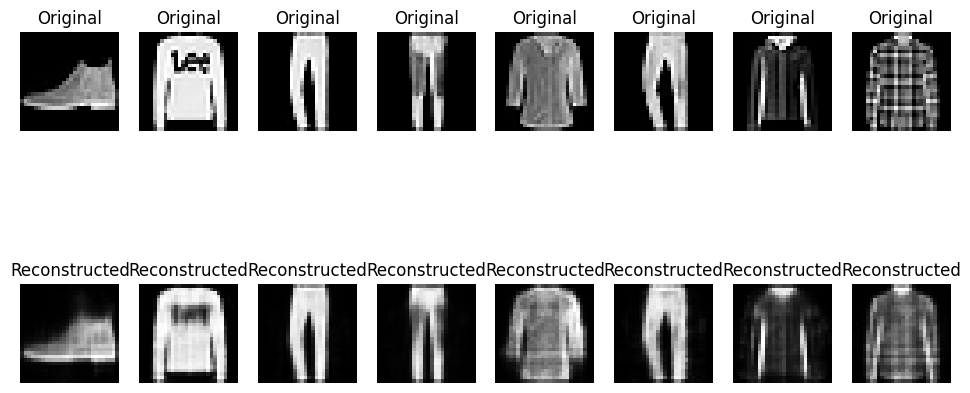

 Manual Reconstruction loss : 0.010106702335178852


In [2]:
#design a simple autoencoder
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from keras.datasets import fashion_mnist

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

class SimpleAutoencoder(Model):
    def __init__(self, latent_dimensions):
        super(SimpleAutoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(28, 28, 1)),
            layers.Flatten(),
            layers.Dense(latent_dimensions, activation='relu'),
        ])

        self.decoder = tf.keras.Sequential([
            layers.Dense(28 * 28, activation='sigmoid'),
            layers.Reshape((28, 28, 1))
        ])

    def call(self, input_data):
        encoded = self.encoder(input_data)
        decoded = self.decoder(encoded)
        return decoded

latent_dimensions = 64
autoencoder = SimpleAutoencoder(latent_dimensions)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 8
plt.figure(figsize=(12, 6))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()

mse=np.mean(np.square(x_test- decoded_imgs))
print(f" Manual Reconstruction loss : {mse}")

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0803 - val_loss: 0.0279
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0254 - val_loss: 0.0200
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0189 - val_loss: 0.0161
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0153 - val_loss: 0.0138
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0134 - val_loss: 0.0125
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0122 - val_loss: 0.0118
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0114 - val_loss: 0.0111
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0109 - val_loss: 0.0107
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0105 - val_loss: 0.0103
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0101 - val_loss: 0.0101


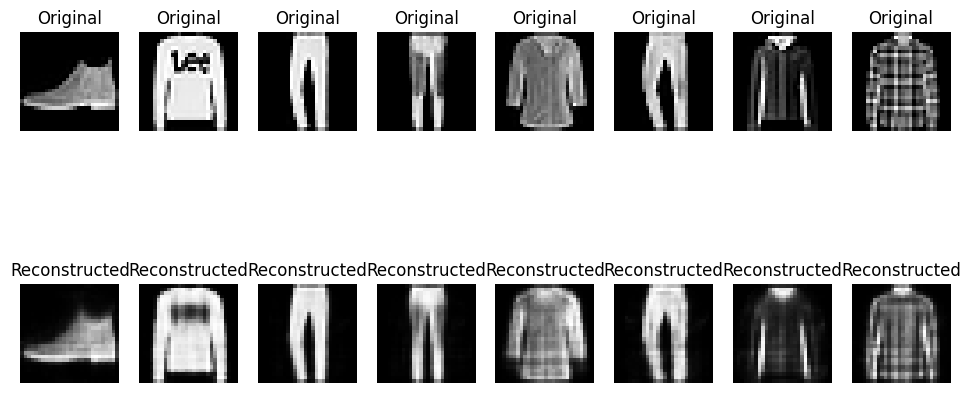

 Manual Reconstruction loss : 0.010053117759525776
 Manual Reconstruction loss : 0.010053117759525776


In [4]:
#design a simple autoencoder
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from keras.datasets import fashion_mnist

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

class SimpleAutoencoder(Model):
    def __init__(self, latent_dimensions):
        super(SimpleAutoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(28, 28, 1)),
            layers.Flatten(),
            layers.Dense(latent_dimensions, activation='relu'),
        ])

        self.decoder = tf.keras.Sequential([
            layers.Dense(28 * 28, activation='sigmoid'),
            layers.Reshape((28, 28, 1))
        ])

    def call(self, input_data):
        encoded = self.encoder(input_data)
        decoded = self.decoder(encoded)
        return decoded

latent_dimensions = 64
autoencoder = SimpleAutoencoder(latent_dimensions)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 8
plt.figure(figsize=(12, 6))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()

mse=np.mean(np.square(x_test- decoded_imgs))
print(f" Manual Reconstruction loss : {mse}")

mse=np.mean(np.square(x_test- decoded_imgs))
print(f" Manual Reconstruction loss : {mse}")